In [15]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest


## Loading the Dataset 

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
X = mnist.data.astype(np.float32)
y = mnist.target.astype(int)

In [4]:
print(f"Dataset images shape: {X.shape}")
print(f"Train labels shape: {y.shape}")

Dataset images shape: (70000, 784)
Train labels shape: (70000,)


## Visualize Some Images

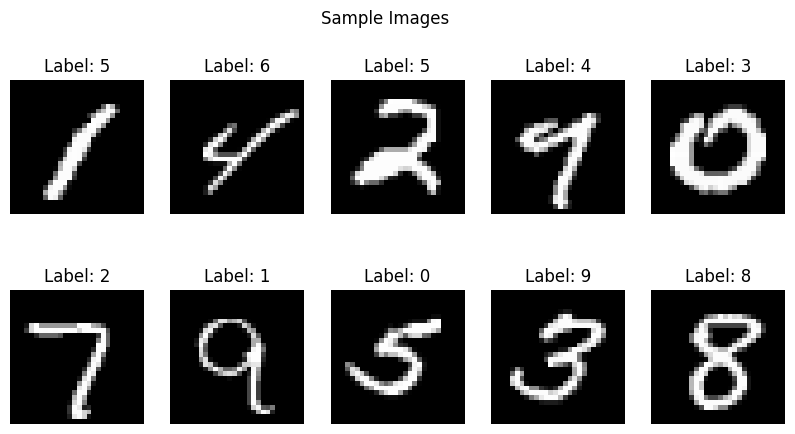

In [22]:
plt.figure(figsize=(10, 5))

num_images = 10
chosen_indices = np.random.choice(range(X.shape[1]), size=num_images, replace=False)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[chosen_indices[i]].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y[-i]}")
    plt.axis('off')
plt.suptitle("Sample Images")
plt.show()

## Distribution of Labels

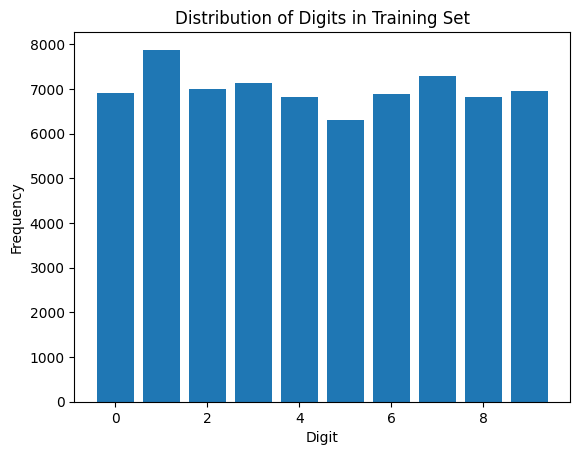

In [6]:
freq = Counter(y)
plt.bar(freq.keys(), freq.values())
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.show()

## Histogram of Pixel Intensity for Each Digit

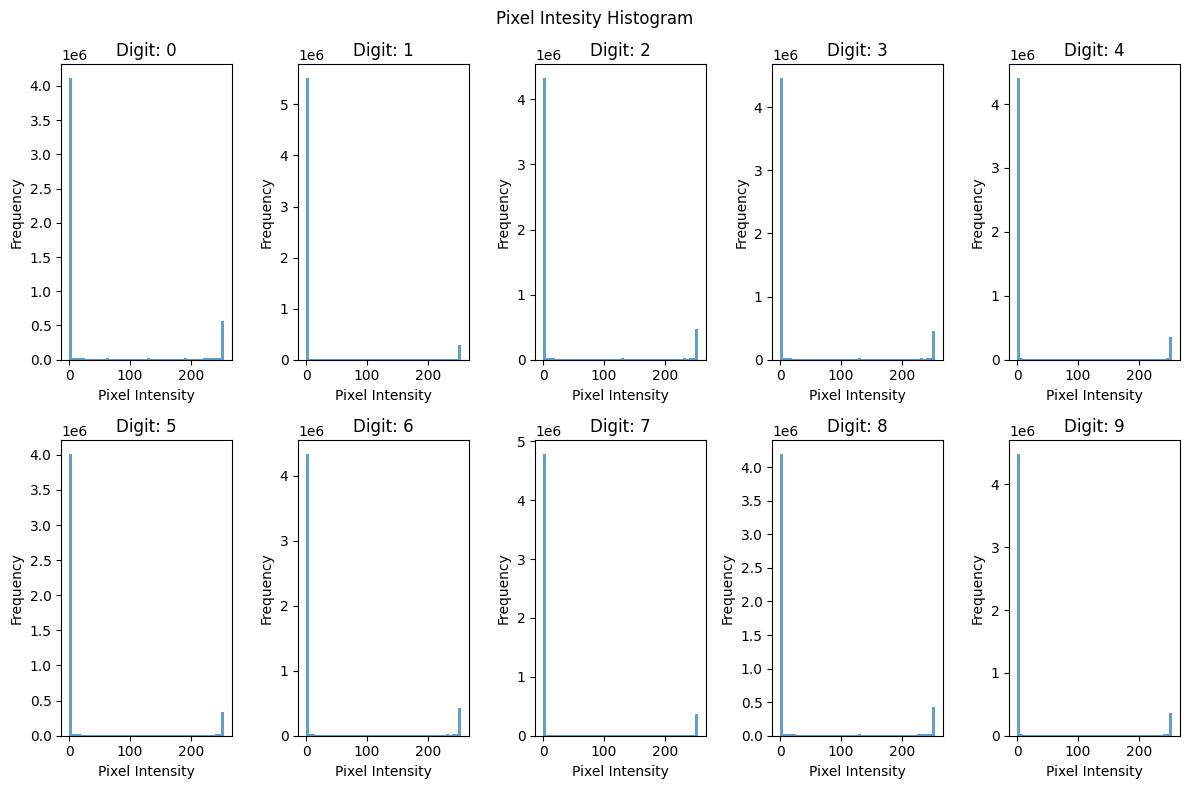

In [13]:
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.hist(X[y == i].ravel(), bins=50, alpha=0.7)
    plt.title(f'Digit: {i}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
plt.suptitle("Pixel Intesity Histogram")
plt.tight_layout()
plt.show()

## Mean Pixel Intensity per Digit

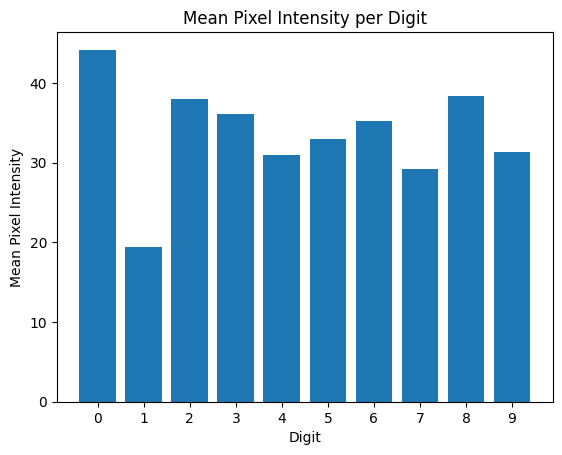

In [14]:
mean_pixel_intensity = [np.mean(X[y == i]) for i in range(10)]
plt.bar(range(10), mean_pixel_intensity)
plt.xlabel("Digit")
plt.ylabel("Mean Pixel Intensity")
plt.title("Mean Pixel Intensity per Digit")
plt.xticks(range(10))
plt.show()

## Mean Images for Each Digit


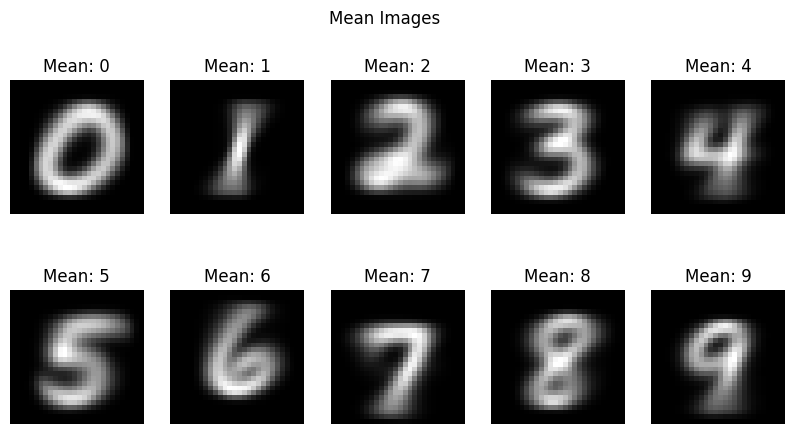

In [7]:
mean_images = [X[y == i].mean(axis=0) for i in range(10)]
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(mean_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Mean: {i}")
    plt.axis('off')
plt.suptitle("Mean Images")
plt.show()

## Correlation Matrix of Mean Images

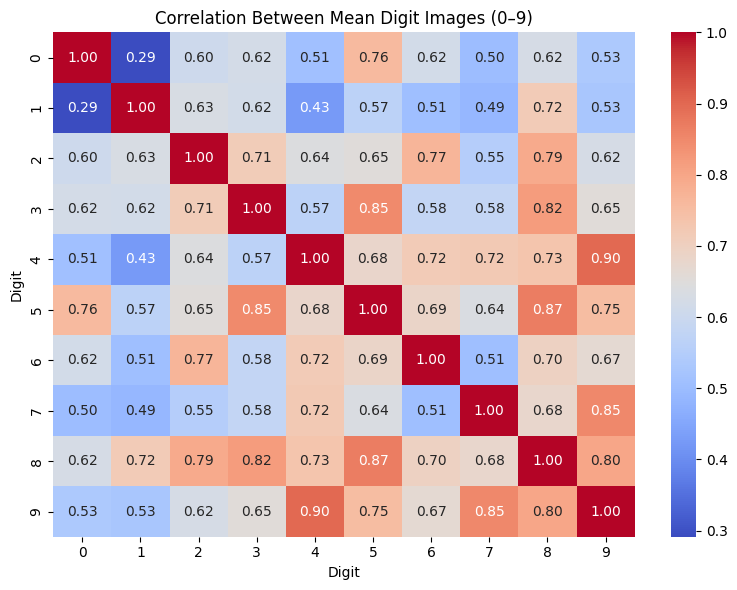

In [8]:
corr_matrix = np.corrcoef(mean_images)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=range(10), yticklabels=range(10))
plt.title("Correlation Between Mean Digit Images (0–9)")
plt.xlabel("Digit")
plt.ylabel("Digit")
plt.tight_layout()
plt.show()

## Cluster Map of the digits

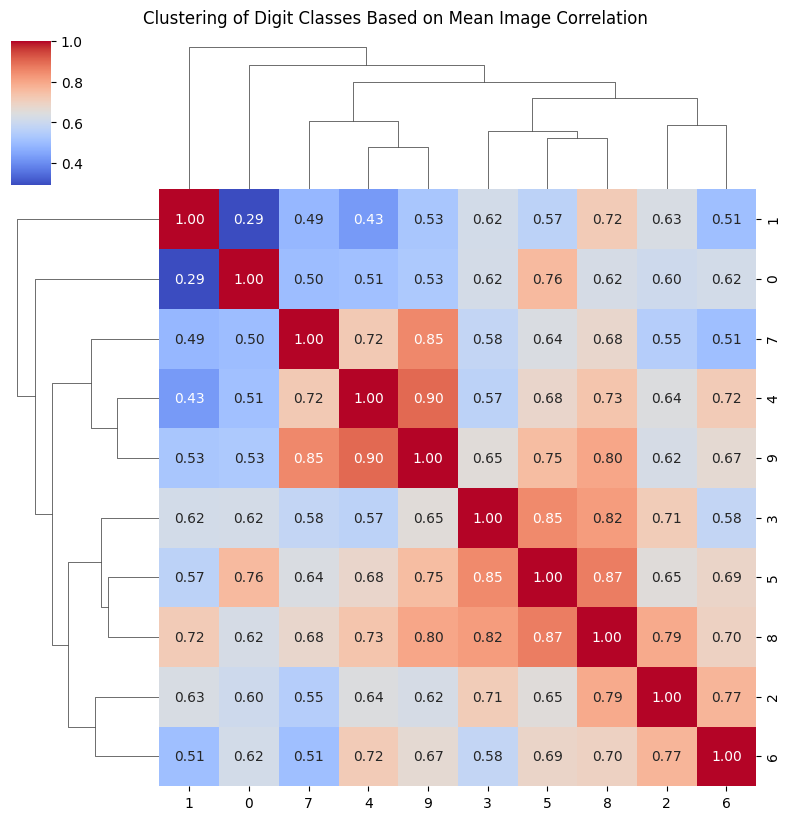

In [9]:
sns.clustermap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    xticklabels=range(10),
    yticklabels=range(10),
    figsize=(8, 8),
)
plt.suptitle("Clustering of Digit Classes Based on Mean Image Correlation", y=1.02)
plt.show()


## PCA Explained Variance

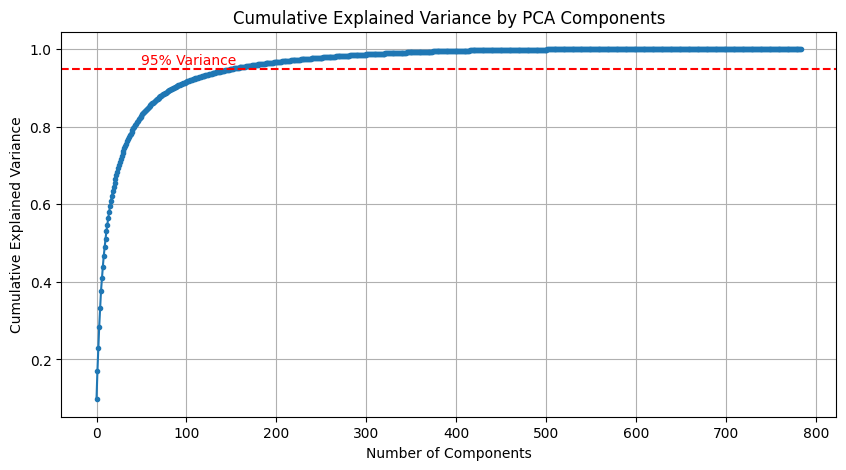

In [10]:
pca = PCA()
pca.fit(X)

plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='.')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')
plt.text(50, 0.96, '95% Variance', color='red')
plt.show()

## Visualizing Outliers

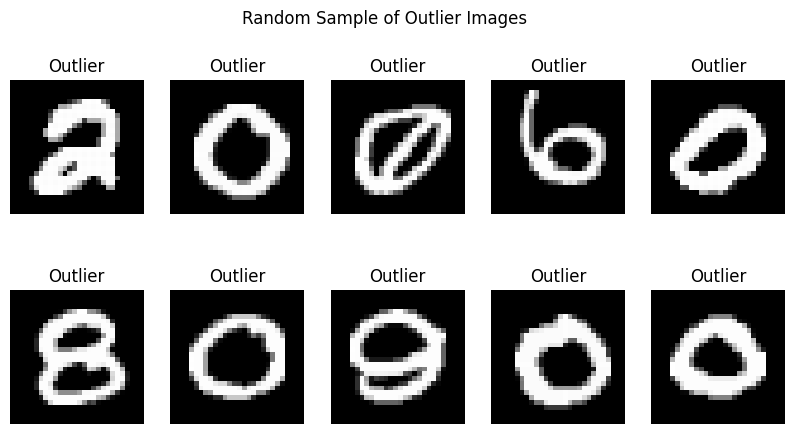

In [20]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outlier_pred = iso_forest.fit_predict(X)

outlier_indices = np.where(outlier_pred == -1)[0]

num_images = 10
chosen_indices = np.random.choice(outlier_indices, size=num_images, replace=False)

plt.figure(figsize=(10, 5))
for i, idx in enumerate(chosen_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[idx].reshape(28, 28), cmap='gray')
    plt.title("Outlier")
    plt.axis('off')
plt.suptitle("Random Sample of Outlier Images")
plt.show()

Loading MNIST dataset...
Applying LDA...
Applying KMeans...

Cluster-Class Breakdown:
        Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  Cluster 5  \
True 0         29         32        202          7          4         18   
True 1         14         17        132       7639          4         34   
True 2        164        232        262        295         24       5559   
True 3         29       6046        365        128         80        159   
True 4       6126          3        115         65        402         26   
True 5         99        467       5139         85        158         27   
True 6        140          5        254         72          3         50   
True 7        174         23         17        151        190         33   
True 8         98        212       5586        537        193         46   
True 9        419         83        103         34       5250         14   

        Cluster 6  Cluster 7  Cluster 8  Cluster 9  
True 0          0       

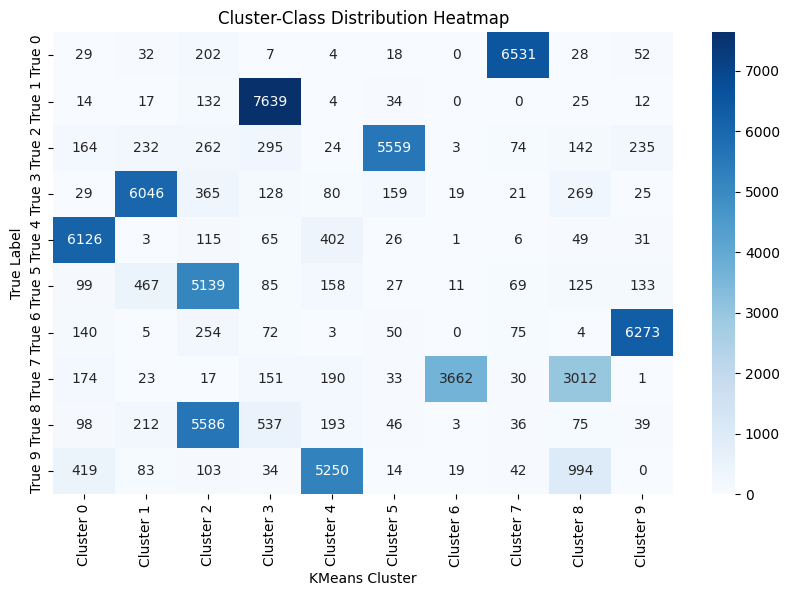


Cluster -> Most Common True Class Mapping:
Cluster 0    True 4
Cluster 1    True 3
Cluster 2    True 8
Cluster 3    True 1
Cluster 4    True 9
Cluster 5    True 2
Cluster 6    True 7
Cluster 7    True 0
Cluster 8    True 7
Cluster 9    True 6
dtype: object


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

# Load MNIST
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist['data']
y = mnist['target'].astype(np.uint8)

# Standardize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA
print("Applying LDA...")
lda = LinearDiscriminantAnalysis(n_components=9)
X_lda = lda.fit_transform(X_scaled, y)

# KMeans clustering
n_clusters = 10
print("Applying KMeans...")
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_lda)

# Step: Cluster-Class Matching Table
print("\nCluster-Class Breakdown:")
conf_matrix = confusion_matrix(y, cluster_labels, labels=range(n_clusters))

# Create DataFrame for readability
df = pd.DataFrame(conf_matrix, index=[f"True {i}" for i in range(10)],
                                 columns=[f"Cluster {i}" for i in range(n_clusters)])
print(df)

# Optional: Heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, fmt='d', cmap='Blues')
plt.title("Cluster-Class Distribution Heatmap")
plt.ylabel("True Label")
plt.xlabel("KMeans Cluster")
plt.show()

# Optional: Cluster -> Majority Class mapping
majority_map = df.idxmax(axis=0)
print("\nCluster -> Most Common True Class Mapping:")
print(majority_map)
